<a href="https://colab.research.google.com/github/Aarushi900/Recipe_Recommendation-_system/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the raw datasets
raw_recipes_df = pd.read_csv('/content/RAW_recipes.csv')
raw_users_df = pd.read_csv('/content/RAW_interactions.csv')

In [ ]:
# Shape of the data
print('The shape of the recipe dataset is:', raw_recipes_df.shape)
print('The shape of the user interactions dataset is:', raw_users_df.shape)

The shape of the recipe dataset is: (231637, 12)
The shape of the user interactions dataset is: (1132367, 5)


In [ ]:
# View recipes dataset
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
# Info about the recipe dataset
raw_recipes_df.info()

In [ ]:
# Convert 'id' and 'contributor_id' columns to object data type
raw_recipes_df['id'] = raw_recipes_df['id'].astype(str)
raw_recipes_df['contributor_id'] = raw_recipes_df['contributor_id'].astype(str)

# Convert 'submitted' column to date data type
raw_recipes_df['submitted'] = pd.to_datetime(raw_recipes_df['submitted'], format='%Y-%m-%d')

# Print updated data types of the columns
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            231636 non-null  object        
 1   id              231637 non-null  object        
 2   minutes         231637 non-null  int64         
 3   contributor_id  231637 non-null  object        
 4   submitted       231637 non-null  datetime64[ns]
 5   tags            231637 non-null  object        
 6   nutrition       231637 non-null  object        
 7   n_steps         231637 non-null  int64         
 8   steps           231637 non-null  object        
 9   description     226658 non-null  object        
 10  ingredients     231637 non-null  object        
 11  n_ingredients   231637 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 21.2+ MB


In [ ]:
# Info about the recipe dataset
raw_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [ ]:
# Convert 'user_id' and 'recipe_id' columns to object data type
raw_users_df['user_id'] = raw_users_df['user_id'].astype(str)
raw_users_df['recipe_id'] = raw_users_df['recipe_id'].astype(str)

# Convert 'submitted' column to date data type
raw_users_df['date'] = pd.to_datetime(raw_users_df['date'], format='%Y-%m-%d')

# Print updated data types of the columns
raw_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1132367 non-null  object        
 1   recipe_id  1132367 non-null  object        
 2   date       1132367 non-null  datetime64[ns]
 3   rating     1132367 non-null  int64         
 4   review     1132198 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 43.2+ MB


In [ ]:
# Checking for missing values
raw_recipes_df.isna().sum()

,0
name,1
id,0
minutes,0
contributor_id,0
submitted,0
tags,0
nutrition,0
n_steps,0
steps,0
description,4979


In [ ]:
# Row with missing name
raw_recipes_df[raw_recipes_df['name'].isna()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


In [ ]:
# Drop row with missing name
raw_recipes_df.dropna(subset=['name'], inplace=True)

In [ ]:
# Row with missing description
raw_recipes_df[raw_recipes_df['description'].isna()].sample(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
8074,apricot custard tart,2994,70,1742,1999-09-10,"['weeknight', 'time-to-make', 'course', 'prepa...","[2997.3, 227.0, 760.0, 72.0, 75.0, 249.0, 120.0]",21,['for crust blend flour sugar and salt in proc...,NaN,"['all-purpose flour', 'golden brown sugar', 's...",12
109299,hot reuben appetizers,19033,35,27411,2002-02-06,"['60-minutes-or-less', 'time-to-make', 'course...","[202.3, 22.0, 11.0, 21.0, 24.0, 40.0, 1.0]",2,['mix together and heat in 325 degrees oven fo...,NaN,"['sauerkraut', 'corned beef', 'swiss cheese', ...",4
64179,creme brulee,696,235,1530,1999-08-11,"['weeknight', 'time-to-make', 'course', 'main-...","[573.3, 74.0, 105.0, 3.0, 13.0, 144.0, 9.0]",52,"['preheat oven to 300f', 'in top of double boi...",NaN,"['heavy cream', 'vanilla bean', 'sugar', 'eggs...",15
75170,easy berry cobler,448859,50,946943,2011-02-16,"['60-minutes-or-less', 'time-to-make', 'course...","[2263.7, 93.0, 908.0, 143.0, 46.0, 45.0, 136.0]",5,"['preheat oven to 350', 'in a 13x9 pan , sprea...",NaN,"['berries', 'yellow cake mix', 'butter']",3
61229,crawfish pie,7716,50,42720,2000-03-13,"['60-minutes-or-less', 'time-to-make', 'main-i...","[369.6, 38.0, 9.0, 66.0, 33.0, 63.0, 6.0]",7,"['saute onions , garlic , bell pepper and cele...",NaN,"['onion', 'crayfish tail', 'green onion', 'par...",16
42201,chicken rice soup,23446,45,1533,2002-03-28,"['60-minutes-or-less', 'time-to-make', 'course...","[291.9, 13.0, 13.0, 8.0, 48.0, 12.0, 9.0]",5,"['combine the broth , thyme , dill , bay leaf ...",NaN,"['fat-free low-sodium chicken broth', 'thyme',...",10
101465,ham and cabbage stew,53015,45,54716,2003-02-02,"['60-minutes-or-less', 'time-to-make', 'course...","[254.9, 22.0, 26.0, 26.0, 35.0, 22.0, 4.0]",8,['in a 5 quart saucepan or dutch oven heat mar...,NaN,"['margarine', 'onion', 'garlic', 'cooked ham',...",13
64277,creole chicken bake,50611,65,58075,2003-01-10,"['weeknight', 'time-to-make', 'course', 'main-...","[573.7, 10.0, 5.0, 32.0, 76.0, 9.0, 28.0]",5,"['in a casserole dish , combine rice , broccol...",NaN,"['boneless skinless chicken breasts', 'broccol...",7
28237,bread pudding with jack daniels sauce,100,162,1571,1999-08-17,"['weeknight', 'time-to-make', 'course', 'prepa...","[517.6, 39.0, 102.0, 21.0, 18.0, 73.0, 18.0]",14,"['cube bread', 'set aside in a large mixing bo...",NaN,"['stale bread', 'milk', 'eggs', 'evaporated mi...",11
101559,ham and coleslaw sandwich,68203,10,80353,2003-08-04,"['ham', '15-minutes-or-less', 'time-to-make', ...","[436.9, 29.0, 25.0, 89.0, 41.0, 21.0, 15.0]",5,"['combine mayonnaise with vinegar , salt and s...",NaN,"['mayonnaise', 'cider vinegar', 'sugar', 'salt...",9


In [ ]:
print('Missing values make up', round(raw_recipes_df.isna().sum().sum()/raw_recipes_df.shape[0]*100, 2), "%", "of the overall data.")

Missing values make up 0.0 % of the overall data.


In [ ]:
# Drop rows with missing description
raw_recipes_df.dropna(subset=['description'], inplace=True)

In [ ]:
# Sanity check
raw_recipes_df.isna().sum()

,0
name,0
id,0
minutes,0
contributor_id,0
submitted,0
tags,0
nutrition,0
n_steps,0
steps,0
description,0


In [ ]:
raw_users_df.isna().sum()

,0
user_id,0
recipe_id,0
date,0
rating,0
review,169


In [ ]:
print('Missing values make up', round(raw_users_df.isna().sum().sum()/raw_users_df.shape[0]*100, 2), "%", "of the overall data.")

Missing values make up 0.01 % of the overall data.


In [ ]:
# Drop rows with missing description
raw_users_df.dropna(subset=['review'], inplace=True)

In [ ]:
# Duplicated rows
print("duplicated rows in recipes dataset:", raw_recipes_df.duplicated().sum())
print("duplicated rows in user interactions dataset:", raw_users_df.duplicated().sum())

duplicated rows in recipes dataset: 0
duplicated rows in user interactions dataset: 0


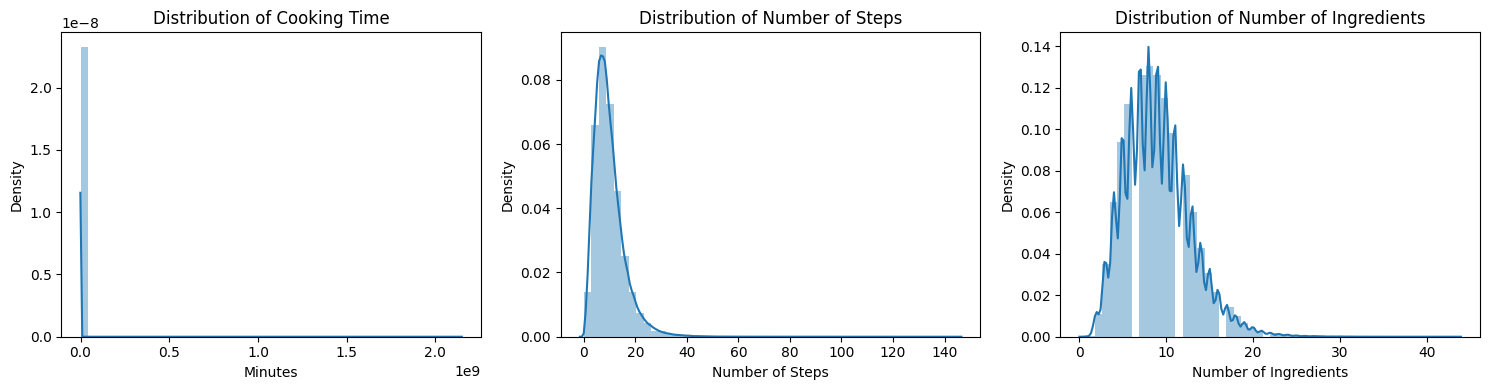

In [ ]:

# Distribution
# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Plot distribution of 'minutes' on the first subplot
sns.distplot(raw_recipes_df["minutes"], ax=ax[0])
ax[0].set_xlabel('Minutes')
ax[0].set_ylabel('Density')
ax[0].set_title('Distribution of Cooking Time')

# Plot distribution of 'n_steps' on the second subplot
sns.distplot(raw_recipes_df["n_steps"], ax=ax[1])
ax[1].set_xlabel('Number of Steps')
ax[1].set_ylabel('Density')
ax[1].set_title('Distribution of Number of Steps')

# Plot distribution of 'n_ingredients' on the third subplot
sns.distplot(raw_recipes_df["n_ingredients"], ax=ax[2])
ax[2].set_xlabel('Number of Ingredients')
ax[2].set_ylabel('Density')
ax[2].set_title('Distribution of Number of Ingredients')

plt.tight_layout()
plt.show()

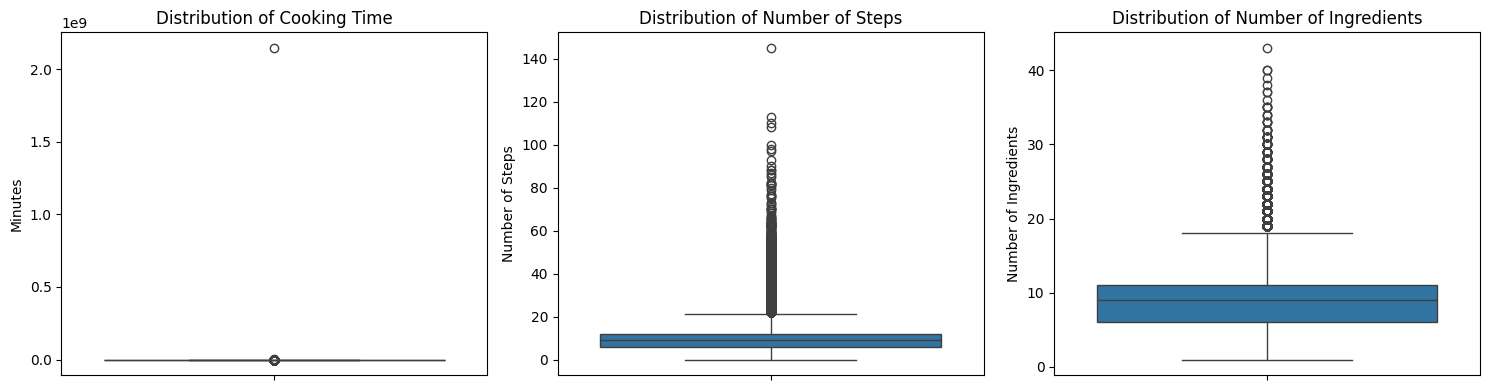

In [ ]:
# Boxplots
# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Plot boxplot of 'minutes' on the first subplot
sns.boxplot(data=raw_recipes_df["minutes"], ax=ax[0])
ax[0].set_ylabel('Minutes')
ax[0].set_title('Distribution of Cooking Time')

# Plot boxplot of 'n_steps' on the second subplot
sns.boxplot(data=raw_recipes_df["n_steps"], ax=ax[1])
ax[1].set_ylabel('Number of Steps')
ax[1].set_title('Distribution of Number of Steps')

# Plot boxplot of 'n_ingredients' on the third subplot
sns.boxplot(data=raw_recipes_df["n_ingredients"], ax=ax[2])
ax[2].set_ylabel('Number of Ingredients')
ax[2].set_title('Distribution of Number of Ingredients')

plt.tight_layout()
plt.show()

In [ ]:
# Cooking time
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['minutes'].quantile(0.25)
Q3 = raw_recipes_df['minutes'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
minutes_outliers = raw_recipes_df[(raw_recipes_df['minutes'] > max_value) | (raw_recipes_df['minutes'] < min_value)]
minutes_outliers.sort_values('minutes')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
206778,sweet rice pudding,454411,133,1889545,2011-04-25,"['time-to-make', 'course', 'main-ingredient', ...","[338.6, 12.0, 185.0, 3.0, 16.0, 20.0, 19.0]",23,"['place the rice in a medium-sized bowl', 'fil...",this is a traditional recipe from india and it...,"['basmati rice', 'whole milk', 'granulated sug...",7
204465,super soft bread machine rolls with wheat germ,210241,133,260718,2007-02-09,"['time-to-make', 'course', 'main-ingredient', ...","[1580.3, 93.0, 106.0, 92.0, 83.0, 171.0, 71.0]",7,"['in bread machine pan , put in the following ...",this recipe is adapted from the buttery bread ...,"['milk', 'vanilla essence', 'butter', 'sugar',...",9
94271,gooey butter cookies,34390,133,43121,2002-07-16,"['weeknight', 'time-to-make', 'course', 'prepa...","[163.3, 14.0, 49.0, 8.0, 3.0, 23.0, 5.0]",8,"['cream together cream cheese and butter', 'ad...",so easy to make and always a hit!,"['cream cheese', 'butter', 'egg', 'vanilla', '...",6
99018,grilled halibut with lemon tarragon mustard,116898,134,39547,2005-04-12,"['time-to-make', 'course', 'main-ingredient', ...","[470.1, 23.0, 2.0, 16.0, 153.0, 12.0, 1.0]",8,['in a small bowl whisk together the lemon jui...,"adapted from a recipe in ""the taste of summer""...","['fresh lemon juice', 'lemon, zest of', 'dijon...",9
183119,sea bass with citrus and soy,23101,134,8688,2002-03-21,"['weeknight', 'time-to-make', 'course', 'main-...","[275.1, 16.0, 24.0, 60.0, 69.0, 9.0, 3.0]",14,"['mix first 6 ingredients in 8x8x2"" glass baki...","simple, elegant and healthy, too! what more ca...","['pineapple juice', 'orange juice', 'soy sauce...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","['cream', 'peach']",2


In [ ]:
# Replace thie cooking time with 25 minutes
raw_recipes_df.loc[raw_recipes_df['id'] == '261647', 'minutes'] = 25

# Check value
raw_recipes_df[raw_recipes_df['id'] == '261647']

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,25,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


In [ ]:
# Remove row
raw_recipes_df = raw_recipes_df[raw_recipes_df['id'] != '447963']

In [ ]:
# Sanity check
raw_recipes_df.sort_values('minutes', ascending=True).tail()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5497,angelica liqueur,70551,201610,59064,2003-09-04,"['weeknight', 'time-to-make', 'course', 'cuisi...","[891.8, 0.0, 906.0, 0.0, 1.0, 0.0, 76.0]",7,"['crush the fennel , aniseed , coriander seeds...",finish off a large meal with a tiny glass of t...,"['fennel seed', 'anise seed', 'coriander seeds...",7
155044,peach brandy,98912,216015,34146,2004-09-01,"['time-to-make', 'course', 'main-ingredient', ...","[3645.3, 3.0, 2040.0, 0.0, 16.0, 0.0, 173.0]",9,"['use only fully ripened , unblemished fruit',...",posted in reply to a message board request for,"['fresh peaches', 'granulated sugar', 'honey',...",4
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3


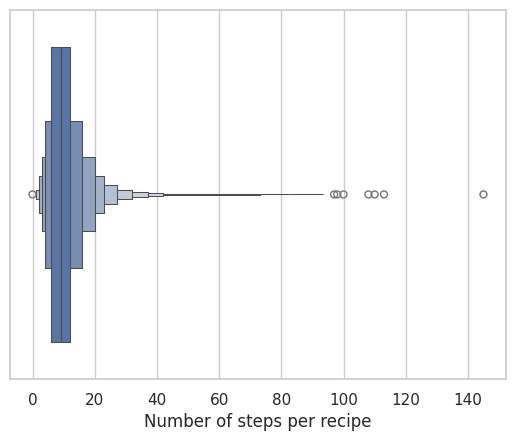

In [ ]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_steps'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

In [ ]:
# Number of steps
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['n_steps'].quantile(0.25)
Q3 = raw_recipes_df['n_steps'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
nsteps_outliers = raw_recipes_df[(raw_recipes_df['n_steps'] > max_value) | (raw_recipes_df['n_steps'] < min_value)]
nsteps_outliers.sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
216131,traditional iraqi casserole tepsi baytinijan,288850,90,510313,2008-02-27,"['time-to-make', 'course', 'main-ingredient', ...","[375.5, 20.0, 51.0, 7.0, 44.0, 25.0, 15.0]",22,['peel the eggplant in wide stripes and remove...,in iraq tepsi baytinijan is a very famous dish...,"['eggplants', 'tomatoes', 'onion', 'garlic clo...",10
70506,deep dish pizza with sausage garlic and mozz...,224394,75,37779,2007-04-24,"['time-to-make', 'course', 'main-ingredient', ...","[929.5, 104.0, 48.0, 113.0, 107.0, 147.0, 7.0]",22,['position oven rack on the 2nd-lowest level i...,a husband favorite,"['olive oil', 'pizza dough', 'mild italian sau...",7
169411,quick tikka masala,369865,45,31807,2009-05-05,"['60-minutes-or-less', 'time-to-make', 'course...","[514.5, 41.0, 8.0, 8.0, 114.0, 54.0, 2.0]",22,['grate 1 piece of ginger into a large zip top...,"adapted from blake royer's ""dinner tonight"" co...","['fresh ginger', 'garlic clove', 'salt', 'grou...",17
33105,cabbage tart,62295,85,80353,2003-05-15,"['weeknight', 'time-to-make', 'course', 'main-...","[614.3, 65.0, 18.0, 41.0, 29.0, 124.0, 14.0]",22,"['for pastry: in a large bowl , combine flour ...",kind of like a cabbage quiche. very tasty - do...,"['all-purpose flour', 'salt', 'butter', 'egg y...",12
132832,meatloaf with tomato gravy,112892,90,126440,2005-03-07,"['time-to-make', 'course', 'main-ingredient', ...","[771.1, 84.0, 26.0, 89.0, 93.0, 97.0, 7.0]",22,"['preheat the oven to 350f', 'in a large skill...",this recipe came from food network. i have mad...,"['dry breadcrumbs', 'olive oil', 'onion', 'gar...",19
...,...,...,...,...,...,...,...,...,...,...,...,...
70088,death by chocolate a la trellis,356724,1680,467583,2009-02-19,"['time-to-make', 'course', 'main-ingredient', ...","[1460.8, 189.0, 262.0, 14.0, 50.0, 380.0, 36.0]",100,"['take a deep breath', ""make sure that you wil...",warning: this dessert is not meant to be eaten...,"['egg whites', 'cream of tartar', 'salt', 'gra...",19
1627,5 cheese crab lasagna with roasted garlic and ...,65007,245,87300,2003-06-18,"['weeknight', 'time-to-make', 'course', 'main-...","[442.8, 35.0, 27.0, 33.0, 50.0, 60.0, 10.0]",108,['roast garlic: place oven rack on second notc...,"this creamy, gooey, gorgeous white lasagna wil...","['garlic', 'extra virgin olive oil', 'dry whit...",24
51532,chocolate raspberry ruffle cake,156874,1080,10033,2006-02-21,"['time-to-make', 'course', 'main-ingredient', ...","[5080.8, 616.0, 967.0, 25.0, 147.0, 1211.0, 12...",110,['first of all: these are not typical directio...,"alice medrich recipe, found in baking with jul...","['unsalted butter', 'pure vanilla extract', 'a...",13
51528,chocolate raspberry mousse truffle cake rasp...,192468,240,232669,2006-10-27,"['time-to-make', 'course', 'main-ingredient', ...","[697.4, 57.0, 249.0, 9.0, 13.0, 105.0, 29.0]",113,"['make the chocolate sour cream cake:', 'prehe...","this recipe is the winner, hands down! just in...","['cake flour', 'baking soda', 'salt', 'godiva ...",24


In [ ]:
# Print the number of outliers
print(f"Based on the Tukey test, {len(nsteps_outliers)} rows are outliers.")

Based on the Tukey test, 9837 rows are outliers.


In [ ]:
# Drop outliers
raw_recipes_df = raw_recipes_df.drop(nsteps_outliers.index)

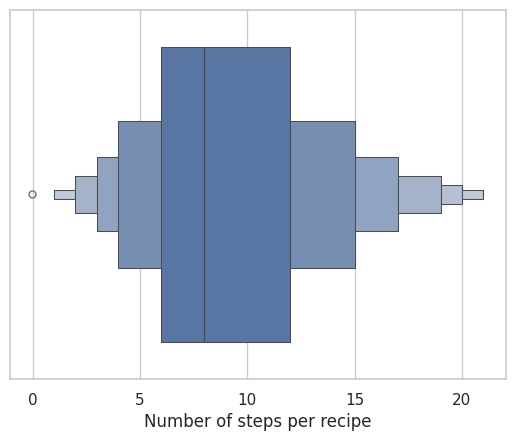

In [ ]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_steps'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

In [ ]:
raw_recipes_df = raw_recipes_df[raw_recipes_df['n_steps'] > 0]


In [ ]:
raw_recipes_df.head().sort_values('n_steps')


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11


In [ ]:
# Number of ingredients
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['n_ingredients'].quantile(0.25)
Q3 = raw_recipes_df['n_ingredients'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
nsteps_outliers = raw_recipes_df[(raw_recipes_df['n_ingredients'] > max_value) | (raw_recipes_df['n_ingredients'] < min_value)]
nsteps_outliers.sort_values('n_ingredients')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
95755,granola extreme,43916,45,27443,2002-10-22,"['60-minutes-or-less', 'time-to-make', 'course...","[105.0, 10.0, 10.0, 2.0, 5.0, 5.0, 3.0]",9,"[""preheat oven 300' degrees"", 'spray 2 baking ...","wholesome snack, great topping for vanilla yogurt","['oatmeal', 'wheat flakes', 'buckwheat flakes'...",19
137311,mocha mini bread loaves,349861,40,1109972,2009-01-14,"['60-minutes-or-less', 'time-to-make', 'course...","[268.4, 12.0, 75.0, 12.0, 14.0, 11.0, 14.0]",7,"['preheat oven to 350 degrees', 'combine dry i...",this is adapted from camilla saulsbury's muffi...,"['whole wheat flour', 'quick-cooking oats', 't...",19
68576,curried meatballs,315007,35,331557,2008-07-22,"['curries', '60-minutes-or-less', 'time-to-mak...","[414.4, 36.0, 21.0, 32.0, 59.0, 34.0, 6.0]",8,['heat oil over medium heat and stir-fry the o...,i was given this recipe by a co-worker of mine...,"['olive oil', 'onions', 'cinnamon stick', 'wat...",19
214382,tofu spinach calzones vegan or vegetarian,97154,35,37584,2004-08-06,"['60-minutes-or-less', 'time-to-make', 'course...","[346.1, 6.0, 8.0, 14.0, 21.0, 3.0, 21.0]",17,['mix water with yeast and sugar in a large mi...,these are great and vegan or vegetarian (see s...,"['warm water', 'yeast', 'sugar', 'salt', 'flou...",19
68671,curried rice and fruit salad,63805,65,37779,2003-06-05,"['weeknight', 'time-to-make', 'course', 'main-...","[379.1, 11.0, 86.0, 16.0, 12.0, 14.0, 24.0]",18,"['wash rice until water runs clear', 'drain we...",this rice salad has exotic flavors that make a...,"['basmati rice', 'peanut oil', 'green onion', ...",19
...,...,...,...,...,...,...,...,...,...,...,...,...
105723,hillbilly bean soup,11737,255,10404,2001-09-18,"['weeknight', 'time-to-make', 'course', 'main-...","[323.0, 2.0, 254.0, 1.0, 8.0, 1.0, 27.0]",6,"['boil the drained , soaked beans with the wat...",great soup for a fall or winters dinner. serve...,"['7 bean mix', 'water', 'ham bone', 'bay leaf'...",35
203614,sunday supper taco salad bowls tacos,502219,240,695000,2013-06-23,"['time-to-make', 'course', 'cuisine', 'prepara...","[10687.7, 1784.0, 49.0, 67.0, 59.0, 802.0, 26.0]",6,['heat vegetable oil to 350f submerge tortilla...,being served again at the free sunday supper o...,"['flour tortillas', 'ground beef', 'vegetable ...",37
18352,basic fried rice with variations,248707,55,305531,2007-08-25,"['60-minutes-or-less', 'time-to-make', 'course...","[793.3, 22.0, 8.0, 23.0, 37.0, 13.0, 48.0]",16,"['dice or shred meat and vegetables', 'heat oi...",another recipe that i acquired from a chinese ...,"['brown rice', 'green onions', 'oil', 'soy sau...",38
116744,kato s garage style tomato sauce meatba...,113677,270,128473,2005-03-18,"['time-to-make', 'course', 'main-ingredient', ...","[412.8, 36.0, 61.0, 47.0, 46.0, 38.0, 8.0]",9,"['spicy tomatoe & vegetable sauce', 'in a larg...",this is our favourite spagetti dinner...we mak...,"['sweet onion', 'garlic cloves', 'green pepper...",39


In [ ]:
raw_users_df.sort_values('rating')


,user_id,recipe_id,date,rating,review
122875,210188,167898,2006-05-16,0,"Thsi is a suggestion regarding the baking pan,..."
438466,2002115316,132263,2018-04-15,0,This is a horrible recipe specially if you are...
1089165,1802911328,120470,2014-07-09,0,"Great recipe! Easy, nutritious and delicious. ..."
1038580,1050313,140700,2010-09-17,0,This recipe rocks! Super easy...follow the re...
731009,2000051597,30664,2015-03-08,0,My oven cooks really hot as well. I put foil o...
...,...,...,...,...,...
439007,683573,83475,2009-01-13,5,"Well, I first have to say that I didn't follow..."
439008,911391,83475,2009-02-02,5,Entire family loved it. Used a mix of white wi...
439009,139475,83475,2009-02-07,5,This is my go-to recipe when I am craving Thai...
439012,347595,83475,2009-03-11,5,This was SO good. I rarely comment on here any...


In [ ]:
# Split the values in the 'nutrition' column into separate columns
nutrition_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

for column in nutrition_columns:
    raw_recipes_df[column] = raw_recipes_df['nutrition'].apply(lambda x: eval(x)[nutrition_columns.index(column)])

# Drop the original 'nutrition' column
raw_recipes_df.drop('nutrition', axis=1, inplace=True)

In [ ]:
# Define the month abbreviation mapping
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Store month and year separately
raw_recipes_df['submitted_month'] = raw_recipes_df['submitted'].dt.month.map(month_mapping)
raw_recipes_df['submitted_year'] = raw_recipes_df['submitted'].dt.year

# Sanity check
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,submitted_month,submitted_year
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Sep,2005
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Jun,2002
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Feb,2005
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Apr,2003
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Oct,2002


In [ ]:
# Store month and year separately
raw_users_df['review_month'] = raw_users_df['date'].dt.month.map(month_mapping)
raw_users_df['review_year'] = raw_users_df['date'].dt.year

# Sanity check
raw_users_df.head()

,user_id,recipe_id,date,rating,review,review_month,review_year
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,Feb,2003
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",Dec,2011
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,Dec,2002
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,Feb,2010
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",Oct,2011


In [ ]:
# Create 5 new features
raw_recipes_df['dairy-free'] = raw_recipes_df['tags'].apply(lambda x: 1 if 'dairy-free' in x else 0)
raw_recipes_df['gluten-free'] = raw_recipes_df['tags'].apply(lambda x: 1 if 'gluten-free' in x else 0)
raw_recipes_df['low-carb'] = raw_recipes_df['tags'].apply(lambda x: 1 if 'low-carb' in x else 0)
raw_recipes_df['vegan'] = raw_recipes_df['tags'].apply(lambda x: 1 if 'vegan' in x else 0)
raw_recipes_df['vegetarian'] = raw_recipes_df['tags'].apply(lambda x: 1 if 'vegetarian' in x else 0)

In [ ]:
# Create a new df that contains the recipe_id and rating only
user_rating = raw_users_df[['recipe_id', 'rating']].copy()
user_rating

,recipe_id,rating
0,40893,4
1,40893,5
2,44394,4
3,85009,5
4,85009,5
...,...,...
1132362,72730,0
1132363,386618,5
1132364,78003,5
1132365,78003,4


In [ ]:
# Group by recipe and take the count and the average rating
user_rating = user_rating.groupby(['recipe_id'])['rating'].agg(['mean','count'])
user_rating.reset_index(inplace=True)

# View table
user_rating.head()

,recipe_id,mean,count
0,100,3.000000,2
1,10000,1.500000,2
2,100000,4.346154,26
3,100001,4.666667,3
4,100002,4.000000,1


In [ ]:
# Merge ratings dataframe with recipe Dataframe
food_df = pd.merge(raw_recipes_df, user_rating, left_on='id',right_on='recipe_id')

# View table
food_df

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian,recipe_id,mean,count
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,Sep,2005,0,0,0,0,1,137739,5.0,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",...,Jun,2002,0,0,0,0,0,31490,3.5,4
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",...,Feb,2005,0,0,0,0,0,112140,4.0,1
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",...,Apr,2003,0,0,0,0,0,59389,4.5,2
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,Oct,2002,0,0,0,0,1,44061,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216806,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",...,Aug,2012,0,0,0,0,0,486161,5.0,6
216807,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",...,Jan,2013,0,0,0,1,1,493372,5.0,1
216808,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",...,Jun,2008,0,0,0,0,0,308080,5.0,5
216809,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",...,Apr,2008,0,0,0,0,0,298512,1.0,1


In [ ]:
# Save the clean datasets

# Individual ones for EDA
raw_recipes_df.to_pickle("clean_recipes.pkl")
raw_users_df.to_pickle("clean_interactions.pkl")
# Merged for modelling
food_df.to_pickle("food.pkl")